# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [209]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,-0.665336,0.358983,-1.685412,-1.515033,-0.272539,-33.926752
1,0.325857,0.331463,0.900521,0.629251,-1.315358,41.931614
2,-0.887441,0.075526,0.098169,0.238798,-0.442507,-65.378483
3,-0.616799,-0.795770,-0.280069,-0.129319,0.091150,-87.772182
4,1.402948,-0.365328,1.654051,-1.924094,-0.523231,91.083341


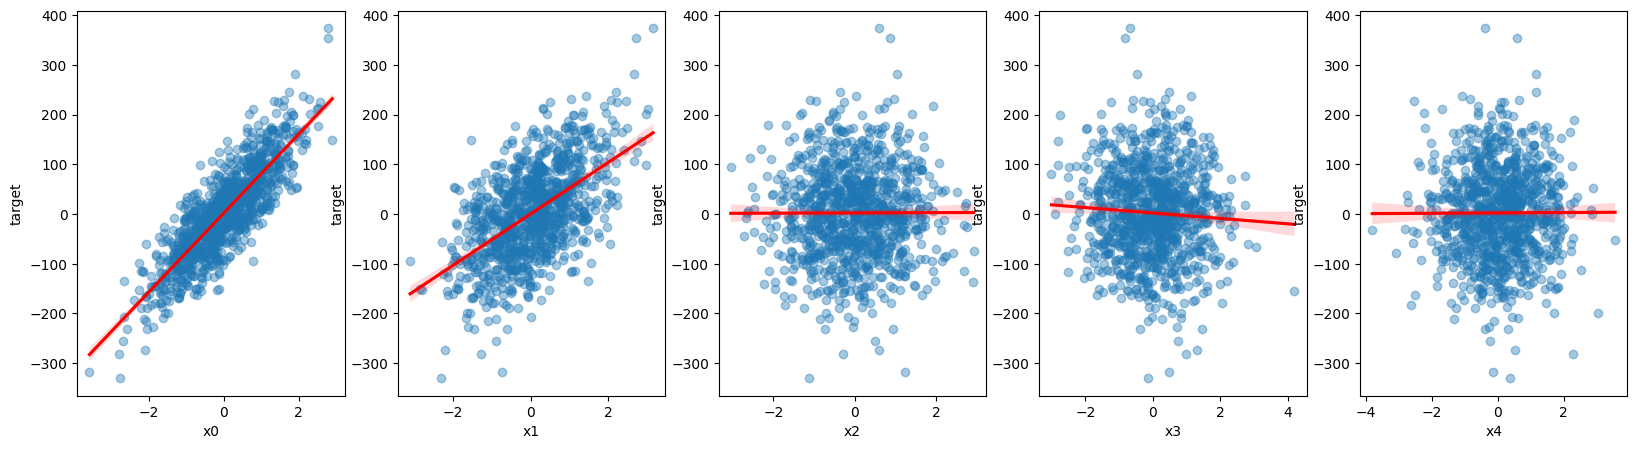

In [212]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [213]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [214]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

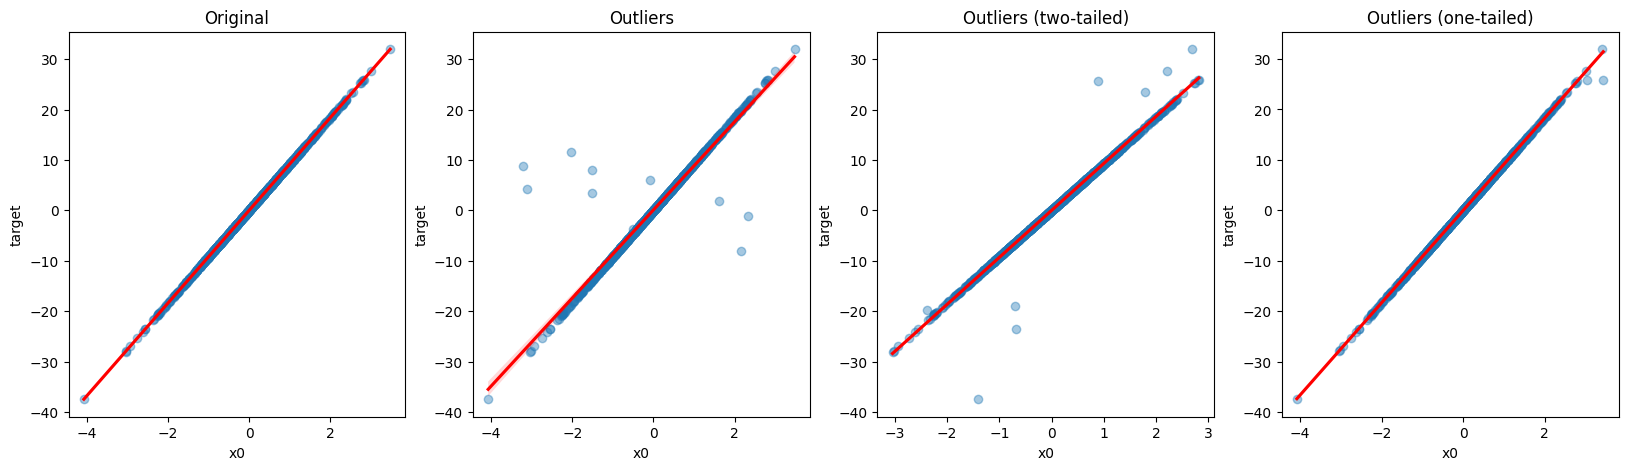

In [215]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

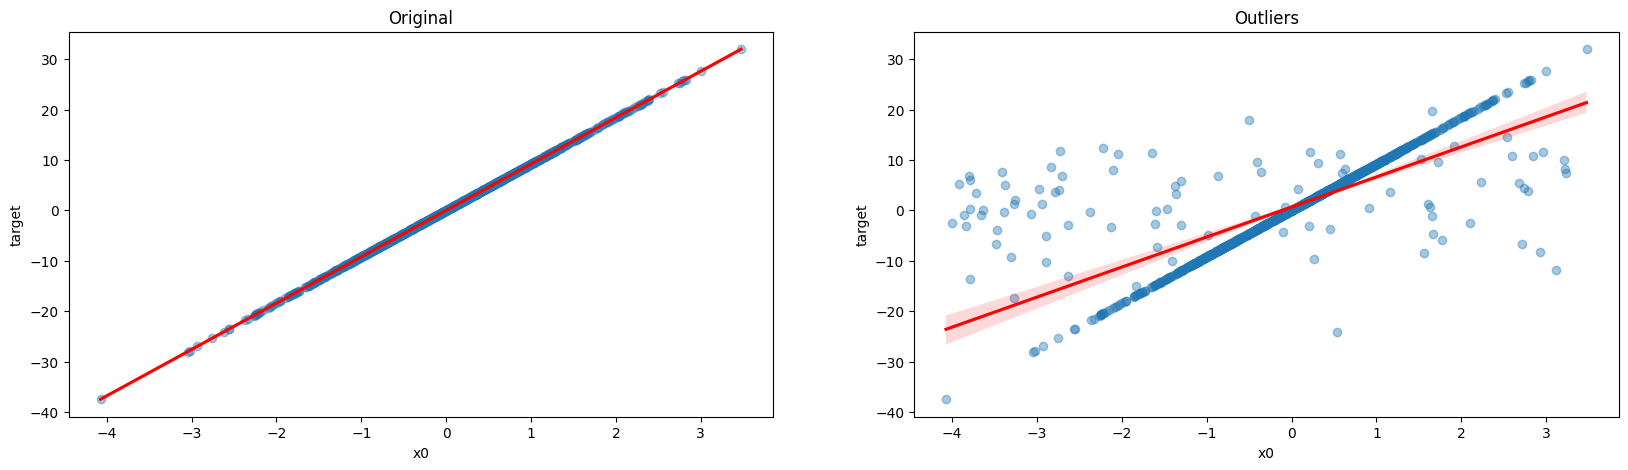

In [216]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [217]:
import numpy as np
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import ttest_1samp

In [218]:
## Parámetros de la simulación
n_exp = 100
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1

noise = np.linspace(0, 100, 100)
bias = np.linspace(0, 100, 20)

In [219]:
# Crear un DataFrame vacío para almacenar los resultados
columnas = ['Experimento', 'Coeficientes', 'RMSE_train', 'RMSE_test', 'MAE_train', 'MAE_test']
df_results = pd.DataFrame(columns=columnas)

In [220]:
## Esqueleto de la simulación
for i in tqdm(range(n_exp)):
    X, y = generate_dataset(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_targets=n_targets,
        noise=20.0,
        bias=0,
        output='array'
    )

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
        
    # Crear y entrenar un modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, Y_train)

    #hacemos las predicciones:
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)

    # Calculamos RMSE y MAE para conjuntos de entrenamiento y prueba
    rmse_train = np.sqrt(mean_squared_error(Y_train, train_predictions))
    mae_train = mean_absolute_error(Y_train, train_predictions)
    rmse_test = np.sqrt(mean_squared_error(Y_test, test_predictions))
    mae_test = mean_absolute_error(Y_test, test_predictions)

    # Almacenamos resultados en el DataFrame
    nueva_fila = {'Experimento': i + 1,
        'Coeficientes': model.coef_,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'MAE_train': mae_train,
        'MAE_test': mae_test
    }

    # Agregamos la nueva fila al DataFrame utilizando loc
    #accedemos a la fila completa, al calcular el largo estaremos una posicion mas al ultimo indice.
    df_results.loc[len(df_results)] = nueva_fila

print(df_results['Coeficientes'])


 28%|██▊       | 28/100 [00:00<00:00, 141.49it/s]

100%|██████████| 100/100 [00:00<00:00, 157.71it/s]

0     [20.062232390268772, 8.03841834623202, -0.7889...
1     [38.961464654436426, 7.446135274524555, -0.073...
2     [74.71587495436563, 61.828650034265706, 0.3515...
3     [44.196060042094416, 57.663484485792964, -0.56...
4     [2.3048831182557987, 67.93256630573825, 0.3401...
                            ...                        
95    [56.55184704027519, 1.3236902139293016, -0.446...
96    [44.12003534157733, 8.96214990237445, 0.335489...
97    [75.63069797611485, 52.7895663073522, 0.426792...
98    [27.536004713886957, 21.899582077707876, 0.006...
99    [89.1155579065431, 6.488355281503242, -0.37518...
Name: Coeficientes, Length: 100, dtype: object


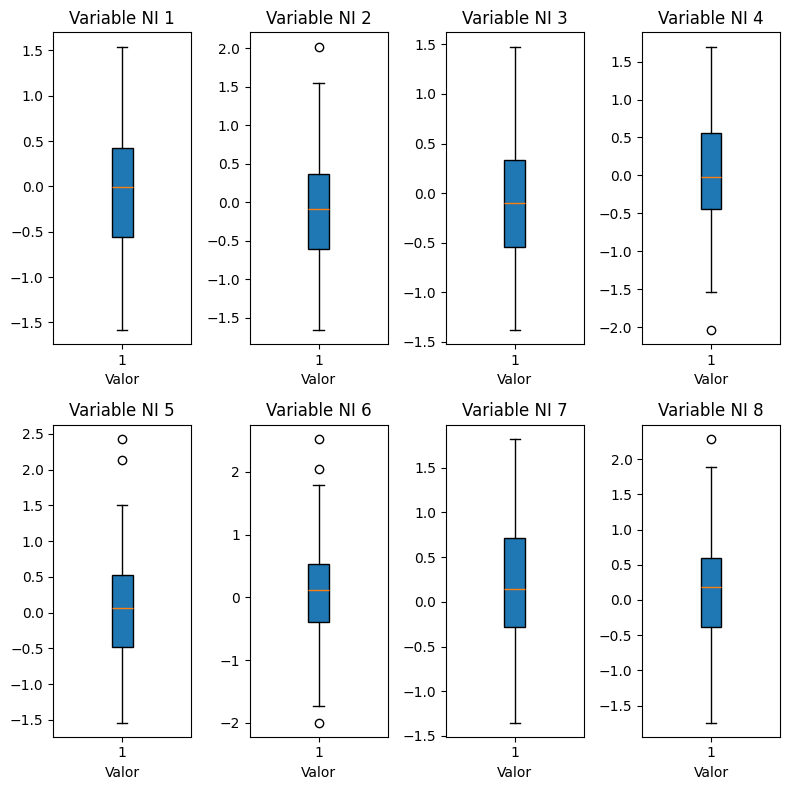

In [221]:
# Analizamos la distribución de coeficientes para variables no informativas
# Obtener los coeficientes de las variables no informativas (las primeras son informativas, el resto son no informativas)
non_informative_coef_values = df_results['Coeficientes'].apply(lambda x: x[n_informative:])

# tenemos n_variables_no_informativas, en nuestro caso sabemos que es 8:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 8)) 

# Iteramos sobre las variables no informativas (o sea, sobre cada grafico)
for i, ax in enumerate(axs.flatten()):

    # Crear un boxplot para la variable no informativa actual
    #boxplot: diagrama de caja, es una representación visual de la distribución estadística de un conjunto de datos.
    data=non_informative_coef_values.apply(lambda x: x[i])
    ax.boxplot(data, patch_artist=True)
    ax.set_title(f'Variable NI {i + 1}')
    ax.set_xlabel('Valor')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

In [222]:
#Realizaremos pruebas de hipótesis para cada variable no informativa
alpha = 0.05
#Establecemos un nivel de significancia:
#α: que generalmente se elige como 0.05. Este valor representa la probabilidad de cometer un error tipo I, es decir, rechazar incorrectamente la hipótesis nula.
significant_coefs = []#almaceramos los coeficientes que resultan significantes
print("non_informative_coef_values.iloc[0]: ", non_informative_coef_values.iloc[0])
for i in range(n_features - n_informative):  # Índices de las variables no informativas
    if i < len(non_informative_coef_values.iloc[0]):  # i tiene que ser menor al largo de la cantidad de coeficientes
        coef_values = non_informative_coef_values.apply(lambda x: x[i])#vamos agarrando todos los valores del primer coeficiente, luego del segundo y asi sucesivamente.


        # Realizar la prueba t de una muestra (comparando con cero)
        t_stat, p_value = ttest_1samp(coef_values, popmean=0)

        # Imprimir resultados
        print(f"\nVariable No Informativa {i+1}:")
        print(f"Estadístico t = {t_stat:.4f}, Valor p = {p_value:.4f}")

        #El estadístico t es una medida de cuántas desviaciones estándar un coeficiente está alejado de cero. Cuanto mayor sea el valor absoluto del estadístico t, mayor será la evidencia en contra de la hipótesis nula (que el coeficiente es cero).
        #Valor p:El valor p es la probabilidad de obtener un estadístico t al menos tan extremo como el observado, si la hipótesis nula es cierta.Un valor p pequeño (generalmente menor que un umbral, como 0.05) sugiere que puedes rechazar la hipótesis nula y concluir que el coeficiente es significativamente diferente de cero.Un valor p grande sugiere que no tienes suficiente evidencia para rechazar la hipótesis nula.

        # Verificar significancia estadística
        if np.any(p_value < alpha):  #Rechazamos la hipotesis nula, los coeficientes no valen 0
            significant_coefs.append(i)#hay suficiente evidencia para decir que los coeficientes no valdran 0 
    else:
        print(f"\nVariable No Informativa {i+1}: No hay suficientes datos para realizar la prueba.")
        pass

print("Coeficientes significantes: ", significant_coefs)

non_informative_coef_values.iloc[0]:  [-0.78898274  1.31611495 -0.40642257  0.60457773 -0.65047748  0.21791391
 -0.40457515 -0.80215765]

Variable No Informativa 1:
Estadístico t = -0.6476, Valor p = 0.5188

Variable No Informativa 2:
Estadístico t = -1.3297, Valor p = 0.1867

Variable No Informativa 3:
Estadístico t = -1.0699, Valor p = 0.2873

Variable No Informativa 4:
Estadístico t = 0.3081, Valor p = 0.7586

Variable No Informativa 5:
Estadístico t = 1.1167, Valor p = 0.2668

Variable No Informativa 6:
Estadístico t = 1.1300, Valor p = 0.2612

Variable No Informativa 7:
Estadístico t = 2.8687, Valor p = 0.0050

Variable No Informativa 8:
Estadístico t = 1.7550, Valor p = 0.0824
Coeficientes significantes:  [6]


### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [223]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

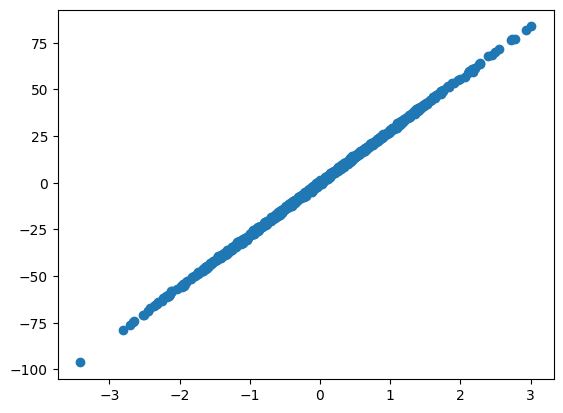

In [224]:
#paso 1, generar dataset de regresion lineal simple:
data = generate_dataset(
            n_samples=1000,
            n_features=1,
            n_targets=1,
            noise=0.5,
            bias=0,
            output='dataframe'
        )
plt.scatter(data['x0'], data['target'])
plt.show()

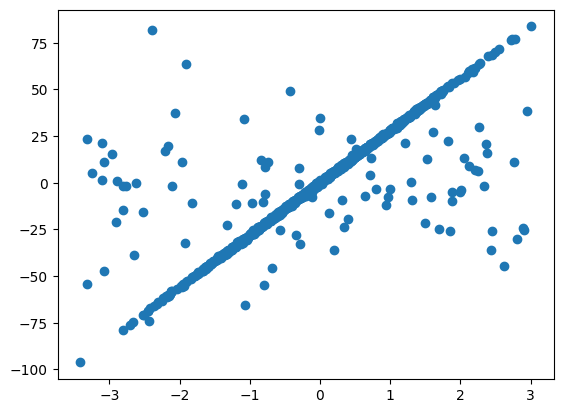

In [225]:
#Paso 2, generamos outliers:    
data_with_outlier = generate_outliers(data, extreme_outliers = False, percentage= 0.1)
plt.scatter(data_with_outlier['x0'], data_with_outlier['target'])
plt.show()

In [226]:
def dividir_dataset(X,y):
    #Primero divimos el dataset en datos de entrenamiento y de testeo:
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

    #reacomodamos a array de dos dimensiones que es lo que pide .fit:
    X_train_array = X_train.to_numpy()
    X_train = X_train_array.reshape(-1, 1)
    X_test_array = X_test.to_numpy()
    X_test = X_test_array.reshape(-1, 1)

    return X_train, X_test, Y_train, Y_test


In [227]:
#dividimos dataset:
X_train, X_test, Y_train, Y_test = dividir_dataset(data_with_outlier['x0'], data_with_outlier['target'])

In [228]:
#- Regresion Lineal simple
def RLS_method(X_train, Y_train):
    RLS = LinearRegression()
    #ENTRENAMOS:
    RLS.fit(X_train, Y_train)
    #PREDECIMOS:
    train_predictions = RLS.predict(X_train)
    test_predictions = RLS.predict(X_test)
    # Calculamos RMSE y MAE para conjuntos de entrenamiento y prueba
    rmse_train = np.sqrt(mean_squared_error(Y_train, train_predictions))
    mae_train = mean_absolute_error(Y_train, train_predictions)
    rmse_test = np.sqrt(mean_squared_error(Y_test, test_predictions))
    mae_test = mean_absolute_error(Y_test, test_predictions)

    r2_RLS = r2_score(Y_test, test_predictions)


    return rmse_train, mae_train, rmse_test, mae_test, r2_RLS, test_predictions

In [229]:
rmse_train, mae_train, rmse_test, mae_test, r2_RLS, test_predictions = RLS_method(X_train, Y_train)


In [230]:
#- Regresion de Huber
#esta es una tecnica de regresión robusta, es menos sensibles a valores atipicos, tales como los outliers.
def RH_method(X_train, Y_train):
    RH = HuberRegressor(epsilon=1.35)
    #ENTRENAMOS:
    RH.fit(X_train, Y_train)
    #PREDICCIONES:
    train_predictions_RH = RH.predict(X_train)
    test_predictions_RH = RH.predict(X_test)
    # Calculamos RMSE y MAE para conjuntos de entrenamiento y prueba
    rmse_train_RH = np.sqrt(mean_squared_error(Y_train, train_predictions_RH))
    mae_train_RH = mean_absolute_error(Y_train, train_predictions_RH)
    rmse_test_RH = np.sqrt(mean_squared_error(Y_test, test_predictions_RH))
    mae_test_RH = mean_absolute_error(Y_test, test_predictions_RH)

    r2_RH = r2_score(Y_test, test_predictions_RH)

    return rmse_train_RH, mae_train_RH, rmse_test_RH, mae_test_RH, r2_RH, test_predictions_RH

In [231]:
rmse_train_RH, mae_train_RH, rmse_test_RH, mae_test_RH, r2_RH, test_predictions_RH = RH_method(X_train, Y_train)

In [232]:
#- Regresión Ridge
#la Regresión Ridge introduce una penalización en la magnitud de los coeficientes para evitar el sobreajuste.
def RR_method(X_train, Y_train):
    RR = RidgeCV()
    #ENTRENAMOS:
    RR.fit(X_train, Y_train)
    #PREDECIMOS:
    train_predictions_RR = RR.predict(X_train)
    test_predictions_RR = RR.predict(X_test)
    # Calculamos RMSE y MAE para conjuntos de entrenamiento y prueba
    rmse_train_RR = np.sqrt(mean_squared_error(Y_train, train_predictions_RR))
    mae_train_RR = mean_absolute_error(Y_train, train_predictions_RR)
    rmse_test_RR = np.sqrt(mean_squared_error(Y_test, test_predictions_RR))
    mae_test_RR = mean_absolute_error(Y_test, test_predictions_RR)

    r2_RR = r2_score(Y_test, test_predictions_RR)

    return rmse_train_RR, mae_train_RR, rmse_test_RR, mae_test_RR, r2_RR, test_predictions_RR

In [233]:
rmse_train_RR, mae_train_RR, rmse_test_RR, mae_test_RR, r2_RR, test_predictions_RR = RR_method(X_train, Y_train)

In [234]:
#algunas metricas:
print("rmse_train_RLS: {}, rmse_train_RH: {}, rmse_train_RR: {}".format(rmse_train, rmse_train_RH, rmse_train_RR))

print("mae_train_RLS: {}, mae_train_RH: {}, mae_train_RR: {}".format(mae_train, mae_train_RH, mae_train_RR))

print("rmse_test_RLS: {}, rmse_test_RH: {}, rmse_test_RR: {}".format(rmse_test, rmse_test_RH, rmse_test_RR))

print("mae_test: {}, mae_test_RH: {}, mae_test_RR: {}".format(mae_test, mae_test_RH, mae_test_RR))

print("r2_RLS: {}, r2_RH: {}, r2_RR: {}".format(r2_RLS, r2_RH, r2_RR))

#r2:  proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes

rmse_train_RLS: 15.908399836844206, rmse_train_RH: 17.772156232243248, rmse_train_RR: 15.908416802355159
mae_train_RLS: 8.859763383006669, mae_train_RH: 4.90055367300682, mae_train_RR: 8.872171264154142
rmse_test_RLS: 16.678440665652584, rmse_test_RH: 19.482832002348356, rmse_test_RR: 16.67495259126149
mae_test: 8.828717590985514, mae_test_RH: 5.47298073105825, mae_test_RR: 8.83939548865204
r2_RLS: 0.6031931978515569, r2_RH: 0.45853250416030433, r2_RR: 0.6033591542428449


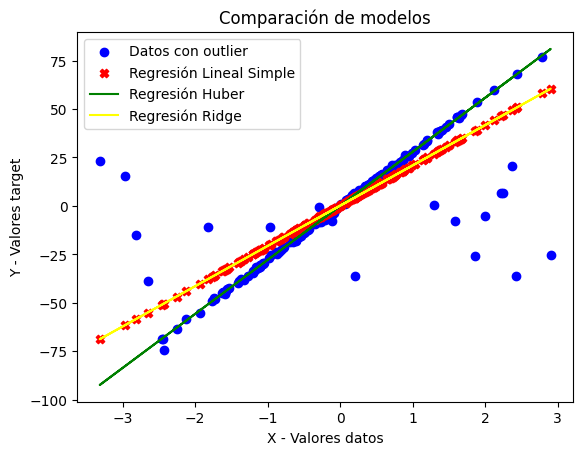

In [235]:
plt.scatter(X_test, Y_test, label= "Datos con outlier", color = "Blue")
plt.scatter(X_test, test_predictions, label = "Regresión Lineal Simple", color = "Red", marker="X")
plt.plot(X_test, test_predictions_RH, label = "Regresión Huber", color = "Green")
plt.plot(X_test, test_predictions_RR, label = "Regresión Ridge", color = "Yellow")
plt.xlabel('X - Valores datos')
plt.ylabel('Y - Valores target')
plt.title('Comparación de modelos')
plt.legend()
plt.show()

Con ayuda del grafico se puede decir que Huber es mucho mas eficas contra outliers.

In [236]:
#Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?
outliers_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#creamos dataframe para guardar datos y luego compararlo en forma de tabla:
df_results = pd.DataFrame(index=[], columns=["Modelo",	"outliers",	"MAE (train)",	"MAE (test)" ,"RMSE (train)", "RMSE (test)", "r2"])
df_results_RH = pd.DataFrame(index=[], columns=["Modelo",	"outliers",	"MAE (train)",	"MAE (test)" ,"RMSE (train)", "RMSE (test)", "r2"])
df_results_RR = pd.DataFrame(index=[], columns=["Modelo",	"outliers",	"MAE (train)",	"MAE (test)" ,"RMSE (train)", "RMSE (test)", "r2"])

for idx, out_value in enumerate(outliers_list):
    #creamos el dataset:
    dataset_with_outlier = generate_outliers(data, extreme_outliers = False, percentage = out_value)
    #dividimos los datos:
    X_train, X_test, Y_train, Y_test = dividir_dataset(dataset_with_outlier['x0'], dataset_with_outlier['target'])

    #llamamos a los modelos:
    rmse_train, mae_train, rmse_test, mae_test, r2_RLS, test_predictions = RLS_method(X_train, Y_train)
    rmse_train_RH, mae_train_RH, rmse_test_RH, mae_test_RH, r2_RH, test_predictions_RH = RH_method(X_train, Y_train)
    rmse_train_RR, mae_train_RR, rmse_test_RR, mae_test_RR, r2_RR, test_predictions_RR = RR_method(X_train, Y_train)

    df_results.at[idx, "Modelo"] = "RLS"
    df_results.at[idx, "outliers"] = out_value
    df_results.at[idx, "MAE (train)"] = mae_train
    df_results.at[idx, "MAE (test)"] = mae_test
    df_results.at[idx, "RMSE (train)"] = rmse_train
    df_results.at[idx, "RMSE (test)"] = rmse_test
    df_results.at[idx, "r2"] = r2_RLS

    df_results_RH.at[idx, "Modelo"] = "RH"
    df_results_RH.at[idx, "outliers"] = out_value
    df_results_RH.at[idx, "MAE (train)"] = mae_train_RH
    df_results_RH.at[idx, "MAE (test)"] = mae_test_RH
    df_results_RH.at[idx, "RMSE (train)"] = rmse_train_RH
    df_results_RH.at[idx, "RMSE (test)"] = rmse_test_RH
    df_results_RH.at[idx, "r2"] = r2_RH
    
    df_results_RR.at[idx, "Modelo"] = "RR"
    df_results_RR.at[idx, "outliers"] = out_value
    df_results_RR.at[idx, "MAE (train)"] = mae_train_RR
    df_results_RR.at[idx, "MAE (test)"] = mae_test_RR
    df_results_RR.at[idx, "RMSE (train)"] = rmse_train_RR
    df_results_RR.at[idx, "RMSE (test)"] = rmse_test_RR
    df_results_RR.at[idx, "r2"] = r2_RR


In [237]:
print(df_results)


  Modelo outliers MAE (train) MAE (test) RMSE (train) RMSE (test)        r2
0    RLS     0.01    1.351208   0.850051      5.60554    1.254317  0.997756
1    RLS     0.02    2.126488   1.843458      6.97569     6.55446  0.938717
2    RLS     0.03     3.69392   2.890006    10.072336    5.873172  0.950795
3    RLS     0.04    4.529881   3.985379    10.758519   10.213244  0.851203
4    RLS     0.05    4.898486   4.930912    12.048286   12.882589  0.763258
5    RLS     0.06    5.590837   5.236062    13.140951   12.251005  0.785902
6    RLS     0.07    7.148488   5.118817    13.946042    8.419507  0.898879
7    RLS     0.08    7.485961   7.553723    14.588299   15.908169  0.638999
8    RLS     0.09    7.995864   8.232451    15.517798    16.82295  0.596287
9    RLS      0.1    8.681533   9.447537    15.470685   16.926156  0.591319


In [238]:
print(df_results_RH)


  Modelo outliers MAE (train) MAE (test) RMSE (train) RMSE (test)        r2
0     RH     0.01    0.915038   0.479757     5.685653    0.914786  0.998806
1     RH     0.02    1.309981   1.072009     7.140857    6.590663  0.938038
2     RH     0.03    1.900975   1.160357    10.528885    5.476334  0.957219
3     RH     0.04    2.373298    1.98421    11.392864   10.463902  0.843809
4     RH     0.05    2.700943   2.958487    12.618392   13.823548  0.727412
5     RH     0.06     3.00177   2.926087    13.880939   13.493793  0.740262
6     RH     0.07    3.922162   1.585196    15.241148    8.022781  0.908184
7     RH     0.08    4.030373   4.405211    16.045175   17.354686  0.570363
8     RH     0.09    4.362641   4.966225    17.034101   18.472753  0.513221
9     RH      0.1    4.741927   6.463843    17.267874   19.664309  0.448398


In [239]:
print(df_results_RR)

  Modelo outliers MAE (train) MAE (test) RMSE (train) RMSE (test)        r2
0     RR     0.01    1.353381   0.852125     5.605541    1.256429  0.997748
1     RR     0.02    2.128637   1.845423     6.975691    6.554655  0.938713
2     RR     0.03    3.714184   2.909763     10.07238    5.883218  0.950626
3     RR     0.04     4.54812   4.002156    10.758558   10.214022   0.85118
4     RR     0.05     4.91794   4.948681    12.048321   12.879089  0.763387
5     RR     0.06    5.608865    5.25268    13.140981   12.247905  0.786011
6     RR     0.07    7.162966    5.13453    13.946065    8.428469  0.898664
7     RR     0.08    7.499831   7.566477     14.58832   15.906969  0.639053
8     RR     0.09    8.009724   8.244774    15.517817   16.821285  0.596367
9     RR      0.1    8.694458   9.457858    15.470703   16.922367  0.591502


## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [240]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """

    if y.size != 1:#cuando tomamos de a una muestra el largo de y es 1, .len() trae problemas
        N = len(y)
    else:
        N = y.size
    
    y_hat = X.dot(theta)

    if N == 0:
        raise ValueError("Número de observaciones (N) no puede ser cero.")

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad



Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [241]:
#1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado por nr de épocas pero también por tolerancia.
def computar_GD(X_train, y_train, X_test, y_test, Theta, learning_rate, iterations, tol):
    mse_train = []
    mse_test = []
    theta_history = []
    grad_history = []

    for i in range(iterations):
        grad = gradient(X_train, y_train, Theta)

        Theta = Theta - learning_rate * grad

        #La magnitud del gradiente indica la velocidad de cambio de los parámetros en una dirección determinada.
        train_mse = mean_squared_error(y_train, X_train.dot(Theta))
        test_mse = mean_squared_error(y_test, X_test.dot(Theta)) 
        mse_train.append(train_mse)
        mse_test.append(test_mse)
        grad_history.append(grad)
        theta_history.append(Theta.copy())
        
        if len(mse_train) > 1:
            if np.abs(mse_train[-1] - mse_train[-2]) <= tol:#Nos fijamos si los cambios no son considerables dejamos de iterar
                print("se cumplio con la tolerancia")
                break

    return Theta, mse_train, mse_test

In [242]:
#2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
new_Dataset = generate_dataset(
            n_samples=10000,
            n_features=1,
            n_targets=1,
            noise=0.5,
            bias=0,
            output='dataframe'
            )

In [243]:
# Agregamos una columna de unos a nuestros datos:
numpy_array = new_Dataset.values 
array_con_unos = np.insert(numpy_array, 0, 1, axis=1)
X = array_con_unos[:,:2]
y = array_con_unos[:, 2]

In [244]:
# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [245]:
#3. Inicializamos un vector beta_0, beta_1 al azar:
Theta = np.random.normal(size=X.shape[1])#lo creamos luego de agregar los 1s al dataset, tener cuidado con esto

In [246]:
#4. Tratamos de calcular los mejores parámetros con el algoritmo GD:
#algunos parametros del entrenamiento:
learning_rate = 0.01
iterations = 1000
tol = 1e-3
#computamos GD:
Best_Theta, mse_train, mse_test = computar_GD(X_train, y_train, X_test, y_test, Theta, learning_rate, iterations, tol)

se cumplio con la tolerancia


In [247]:
# Imprimir algunos resultados
print("Mejores parámetros (beta_0, beta_1):", Best_Theta)
print("Función de pérdida en test:", mse_test[-1])
print("Función de pérdida en train:", mse_train[-1])

Mejores parámetros (beta_0, beta_1): [1.23126493e-02 9.01281793e+01]
Función de pérdida en test: 0.27422768242715867
Función de pérdida en train: 0.28229400845098673


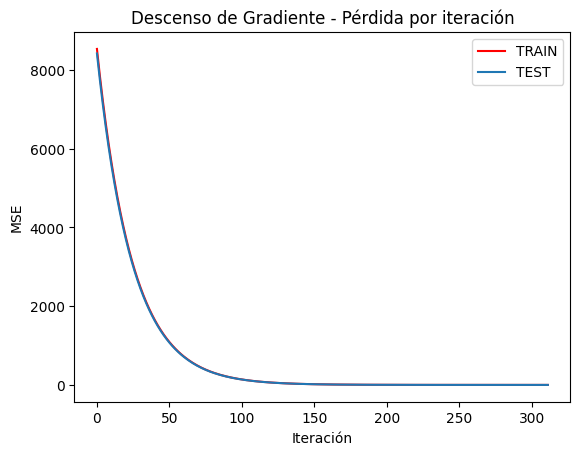

In [248]:
#GRAFICO ERRORES:
plt.figure
plt.plot(mse_train, label = "TRAIN", color = "Red")
plt.plot(mse_test, label = "TEST")
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.title('Descenso de Gradiente - Pérdida por iteración')
plt.legend()
plt.show()

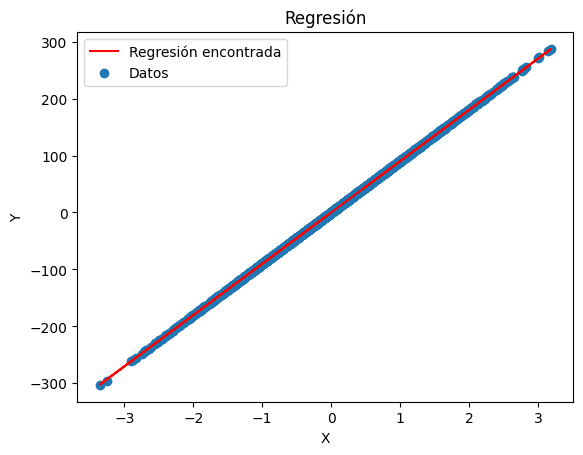

In [249]:
#regresión encontrada:
plt.figure
plt.plot(X_test[:, 1], X_test.dot(Best_Theta), label = "Regresión encontrada", color = "Red")
plt.scatter(X_test[:, 1], y_test, label = "Datos")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión')
plt.legend()
plt.show()

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [250]:
def computar_GDE(X_train, y_train, X_test, y_test, Theta, learning_rate, batch_size, iterations, tol):
    mse_train_e = []
    mse_test_e = []


    for i in range(iterations):
        
        random_indices = np.random.permutation(len(y_train))
        for idx in random_indices:#vamos a tomar de a una muestra
            X_batch = X_train[idx, :].reshape(1, -1)
            y_batch = y_train[idx]


            grad = gradient(X_batch, y_batch, Theta)

            Theta = Theta - learning_rate * grad
            

        #La magnitud del gradiente indica la velocidad de cambio de los parámetros en una dirección determinada.
        train_mse_e = (y_batch - X_batch.dot(Theta))**2
        #test_mse_e = mean_squared_error(y_test, X_test.dot(Theta)) 
        mse_train_e.append(train_mse_e)
        #mse_test_e.append(test_mse_e)

        test_mse_e = np.mean((y_test - X_test.dot(Theta))**2)
        #test_mse_e = mean_squared_error(y_test, X_test.dot(Theta)) 
        mse_test_e.append(test_mse_e)
        #mse_test_e.append(test_mse_e)

        if len(mse_train_e) > 1:

            if np.abs(mse_train_e[-1] - mse_train_e[-2]) <= tol:#Nos fijamos si los cambios no son considerables dejamos de iterar
                print("se cumplio con la tolerancia")
                break

        
    
    return Theta, mse_train_e, mse_test_e

In [251]:
Best_Theta_e, mse_train_e, mse_test_e = computar_GDE(X_train, y_train, X_test, y_test, Theta, learning_rate, 25, iterations, tol)

se cumplio con la tolerancia


In [252]:
# Imprimir los resultados
print("Mejores parámetros (beta_0, beta_1):", Best_Theta_e)
print("Función de pérdida en test:", mse_test_e[-1])

Mejores parámetros (beta_0, beta_1): [-1.08922097e-02  9.03000103e+01]
Función de pérdida en test: 0.2548522654840592


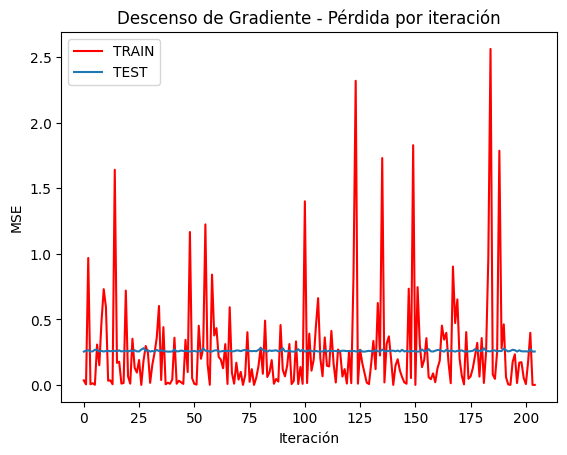

In [253]:
#GRAFICO ERRORES:
plt.figure
plt.plot(mse_train_e, label = "TRAIN", color = "Red")
plt.plot(mse_test_e, label = "TEST")
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.title('Descenso de Gradiente - Pérdida por iteración')
plt.legend()
plt.show()

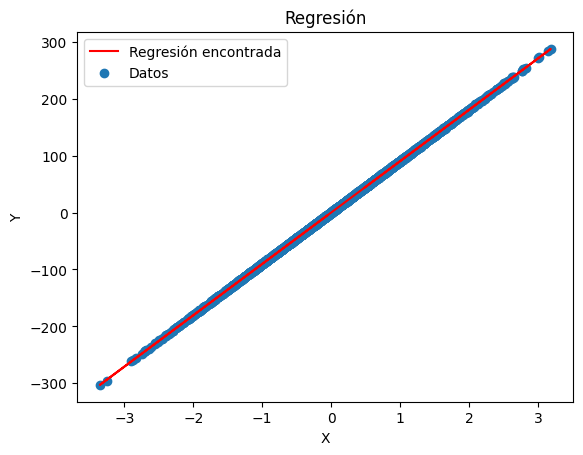

In [254]:
#regresión encontrada:
plt.figure
plt.plot(X_test[:, 1], X_test.dot(Best_Theta_e), label = "Regresión encontrada", color = "Red")
plt.scatter(X_test[:, 1], y_test, label = "Datos")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión')
plt.legend()
plt.show()

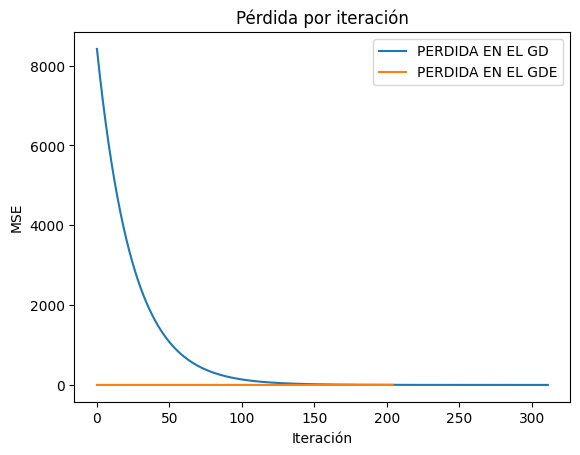

In [255]:
#COMPARACION ENTRE LOS DOS ALGORITMOS, CURVA DE PERDIDA vs EPOCHS:
plt.figure
plt.plot(mse_test, label = "PERDIDA EN EL GD")
plt.plot(mse_test_e, label = "PERDIDA EN EL GDE")
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.title('Pérdida por iteración')
plt.legend()
plt.show()

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

A veces el SGD suele ser mas rapido que el GD, esto varia.

In [256]:
#SIMULAMOS PARA VARIOS LEARNING_RATE:
learning_rate = 0.1
Best_Theta, mse_train, mse_test = computar_GD(X_train, y_train, X_test, y_test, Theta, learning_rate, iterations, tol)
Best_Theta_e, mse_train_e, mse_test_e = computar_GDE(X_train, y_train, X_test, y_test, Theta, learning_rate, 25, iterations, tol)

print("Theta para GD: ", Best_Theta)
print("Theta para SGD: ", Best_Theta_e)

print("mse_train para GD: ", mse_train)
print("mse_train para SGD: ", mse_train_e)

print("mse_test para GD: ", mse_test)
print("mse_test para SGD: ", mse_test_e)

se cumplio con la tolerancia
se cumplio con la tolerancia
Theta para GD:  [5.15338359e-03 9.02392386e+01]
Theta para SGD:  [-0.2708628 90.1821946]
mse_train para GD:  [5635.848432132729, 3572.0316647264913, 2264.06574836318, 1435.1075870051075, 909.7200130209542, 576.7247234085022, 365.66391417044383, 231.88476447060106, 147.08772388873865, 93.33697728021244, 59.26479449495286, 37.66611634405062, 23.9741362418668, 15.294184180355934, 9.79142526979016, 6.302787745022559, 4.090999606491064, 2.6886909077787235, 1.7995793206242972, 1.2358357998671263, 0.8783822447546756, 0.6517245042632673, 0.5079987886992471, 0.41685826753531524, 0.3590617391184889, 0.3224090933598385, 0.29916447870075474, 0.2844225966664789, 0.2750729072261255, 0.26914289993755885, 0.26538169350009433, 0.26299600833068526, 0.26148274948339845, 0.2605228460214766]
mse_train para SGD:  [array([0.00554858]), array([0.01364334]), array([0.00117208]), array([0.01980133]), array([0.09457142]), array([0.04018054]), array([0.192

Disminuir el lr disminuye los errores para SGD y los aumenta para GD.
Aumentar el lr hace que SGD sea mas lento.

### Ejercicio 7

En este ejercicio vamos a considerar la regresión logística como un problema de clasificación binaria. La implementación de la misma podemos considerar la siguiente:


In [257]:
class LogisticRegressionSGD():
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, fit_intercept=True, random_state=42):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.random_state = random_state
        self.weights = None
        self.loss = None
        self.loss_history = None
        self.grad_history = None
        self.theta_history = None


    def _add_intercept(self, X:np.ndarray):
        """
        Agrega una columna de unos al inicio de la matriz X (para el término de intersección).
        """
        intercept = np.ones((X.shape[0], 1))

        return np.hstack((intercept, X))
    

    def fit(self, X, y):
        """
        Fit the model according to the given training data.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        self : LogisticRegressionSGD
            The fitted model.
        """

        # Verificación de que las dos matrices tengan la misma longitud
        assert len(X) == len(y), "La matriz de observaciones y el vector de etiquetas deben ser del mismo tamaño."

        if self.fit_intercept:
            X = self._add_intercept(X)


        #esta línea de código se utiliza para controlar la reproducibilidad de los resultados que involucran generación de números aleatorios:
        #establecer la semilla del generador de números aleatorios de NumPy
        np.random.seed(self.random_state)
        #Genera un array de números aleatorios distribuidos normalmente:
        #se esta generando un peso para cada caracteristica (feature) del conjunto de datos
        self.weights = np.random.normal(size=X.shape[1])
        self.loss_history = []
        self.grad_history = []
        self.theta_history = []

        self.SGD(X, y)

        return self

    def _step(self, X, y):
        """
        Perform a single gradient step.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        loss : float
            The value of the loss function for the current value of the weights.

        grad : numpy.ndarray
            The gradient of the loss function for the current value of the weights.
        """
        N = y.size
        y_hat = self.logit(X)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        grad = (-1 / N) * X.T.dot(y - y_hat)

        return loss, grad

    def SGD(self, X, y):
        """
        Perform the stochastic gradient descent optimization algorithm.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).
        """
        for _ in range(self.max_iter):
            # Cambios en esta línea para implementar SGD
            random_indices = np.random.permutation(len(y))
            for idx in random_indices:#vamos a tomar de a una muestra
                X_batch = X[idx, :].reshape(1, -1)
                y_batch = y[idx]

                loss, grad = self._step(X_batch, y_batch)
                self.weights -= self.lr * grad
                self.loss_history.append(loss)
                self.grad_history.append(grad)
                self.theta_history.append(self.weights.copy())

            if len(self.loss_history) > 1:
                if np.abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                    print("SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR")
                    break

        return self

    def logit(self, X):
        """
        Calculate the logit of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        logit : numpy.ndarray
            The logit of the observations. An array of shape (n_samples,).
        """
        return 1 / (1 + np.exp(-X.dot(self.weights)))

    def predict_proba(self, X):
        """
        Predict the probability of each class for a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        proba : numpy.ndarray
            The predicted probability of each class. An array of shape (n_samples,).
        """
        return self.logit(X)
    

    def predict(self, X):
        """
        Predict the class of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        y_pred : numpy.ndarray
            The predicted class. An array of shape (n_samples,).
        """
        X = self._add_intercept(X)#le agregamos la columna de 1s.

        return (self.predict_proba(X) >= 0.5).astype(int)

    def score(self, X, y):
        """
        Calculate the accuracy of the model.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        score : float
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)

Con esta clase, vamos a tomar el dataset de breast cancer y vamos a realizar una clasificación binaria. La idea de este ejercicio es que puedan jugar con la manera de obtener los hiperparámetros óptimos para el modelo.

Para ello van a tener que completar el método SGD de la clase LogisticRegressionSGD y luego realizar una búsqueda de grilla para encontrar los mejores hiperparámetros.

In [258]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X,y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [259]:
#un visto del dataset para ver si necesitamos agregar 1s:
print(X_train[:5, :])

[[9.029e+00 1.733e+01 5.879e+01 2.505e+02 1.066e-01 1.413e-01 3.130e-01
  4.375e-02 2.111e-01 8.046e-02 3.274e-01 1.194e+00 1.885e+00 1.767e+01
  9.549e-03 8.606e-02 3.038e-01 3.322e-02 4.197e-02 9.559e-03 1.031e+01
  2.265e+01 6.550e+01 3.247e+02 1.482e-01 4.365e-01 1.252e+00 1.750e-01
  4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 1.311e+03 1.141e-01 2.832e-01 2.487e-01
  1.496e-01 2.395e-01 7.398e-02 6.298e-01 7.629e-01 4.414e+00 8.146e+01
  4.253e-03 4.759e-02 3.872e-02 1.567e-02 1.798e-02 5.295e-03 2.668e+01
  3.348e+01 1.765e+02 2.089e+03 1.491e-01 7.584e-01 6.780e-01 2.903e-01
  4.098e-01 1.284e-01]
 [9.173e+00 1.386e+01 5.920e+01 2.609e+02 7.721e-02 8.751e-02 5.988e-02
  2.180e-02 2.341e-01 6.963e-02 4.098e-01 2.265e+00 2.608e+00 2.352e+01
  8.738e-03 3.938e-02 4.312e-02 1.560e-02 4.192e-02 5.822e-03 1.001e+01
  1.923e+01 6.559e+01 3.101e+02 9.836e-02 1.678e-01 1.397e-01 5.087e-02
  3.282e-01 8.490e-02]
 [1.065e+01 2.522e+01 6.801e+01 3.470e+02 9.657e-02 7.234e-02 2.379

In [260]:
#CREAMOS EL MODELO:
model = LogisticRegressionSGD(lr=0.1, max_iter=1000, tol=1e-3, fit_intercept=True, random_state=42)

In [261]:
#ESTANDARIZAMOS NUESTROS DATOS:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [262]:
#ENTRENAMOS EL MODELO:
%timeit -r 1 -n 1 model.fit(X_train, y_train)

SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
97.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [263]:
#HACEMOS LAS PREDICICONES:
#escalamos
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [264]:
#eficiencia obtenida:
print("testing accuracy: ", model.score(X_test, y_test))

testing accuracy:  0.9912280701754386


In [265]:
#parametros obtenidos:
print("Parametros: ", model.weights)

Parametros:  [ 0.28720472 -0.78745942 -0.39516616  0.90456576 -0.86629698 -0.43647977
  1.93321157 -0.329169   -1.44830771  0.53097458 -0.06643292 -0.56613648
  0.242309   -1.46681941 -1.95869828 -0.76874595  0.36326681  0.21749551
 -0.74328964  0.0981786   2.19889967 -0.99788804 -1.92858955 -1.94326534
 -1.2471809  -0.66431207 -0.86853535 -0.81044132 -1.29967539 -1.13007068
 -0.71702796]


HACEMOS LA BUSQUEDA DE LOS MEJORES HIPERPARAMETROS:

In [266]:
#Definimos los hiperparametros:
lr = [1, 0.1, 0.01, 0.001, 0.0001]
iter = [200, 500, 1000, 2000, 3000]

In [267]:
for i in lr:
    for j in iter:
        #CREAMOS EL MODELO:
        model = LogisticRegressionSGD(lr=i, max_iter=j, tol=1e-3, fit_intercept=True, random_state=42)

        #ENTRENAMOS EL MODELO:
        #%timeit -r 1 -n 1 
        model.fit(X_train, y_train)


        #HACEMOS LAS PREDICICONES:
        Accurary_test = model.score(X_test, y_test)
        #eficiencia obtenida:
        print("testing accuracy para lr: {} y iter: {}: ".format(i, j), Accurary_test)


SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 1 y iter: 200:  0.956140350877193
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 1 y iter: 500:  0.956140350877193
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 1 y iter: 1000:  0.956140350877193
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 1 y iter: 2000:  0.956140350877193


C:\Users\franco\AppData\Local\Temp\ipykernel_17048\1746249181.py:81: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
C:\Users\franco\AppData\Local\Temp\ipykernel_17048\1746249181.py:81: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 1 y iter: 3000:  0.956140350877193
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.1 y iter: 200:  0.9912280701754386
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.1 y iter: 500:  0.9912280701754386


SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.1 y iter: 1000:  0.9912280701754386
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.1 y iter: 2000:  0.9912280701754386
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.1 y iter: 3000:  0.9912280701754386
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.01 y iter: 200:  0.9912280701754386
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.01 y iter: 500:  0.9912280701754386
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.01 y iter: 1000:  0.9912280701754386
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.01 y iter: 2000:  0.9912280701754386
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.01 y iter: 3000:  0.9912280701754386
SE CUMPLE CON LA TOLERANCIA, SE DEJA DE ITERAR
testing accuracy para lr: 0.001 y iter: 200:  0.95614035087719

Se obtienen mejor resultados para lr = 0.1 y cualquier combinación de iteraciones que propusismos.
Lo mimso para lr = 0.01.

Use este enfoque con dos bucles for porque implementaciones con GridSearchCV no convergia y no pude encontrar el error.